In [1]:
print("------ IMPORT LIBRARY ------")

import warnings
warnings.filterwarnings('ignore')
from nilmtk import DataSet
from rnndisaggregator import RNNDisaggregator
from nilmtk.datastore import HDFDataStore
import matplotlib.pyplot as plt
import metrics

# skip if you already have .h5 dataset
# from nilmtk.dataset_converters import convert_ukdale
# convert_ukdale('./data/REDD/low_freq', './data/REDD/redd.h5') 

------ IMPORT LIBRARY ------


/Users/Caim03/Documents/Università/Tesi/Disaggregation/RNN/rnndisaggregator.py:110: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(mainlist) == len(meterlist), "Number of main and meter channels should be equal")
Using TensorFlow backend.
/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/tensorflow/python/framework/ops.py:923: DeprecationWarning: builtin type EagerTensor has no __module__ attribute
  EagerTensor = c_api.TFE_Py_InitEagerTensor(_EagerTensorBase)
/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*

In [8]:
print("------ SET GLOBAL VARIABLES ------")

DATASET = "../data/REDD/redd.h5" # path of redd data
MODEL = "../data/REDD/fridge-model-redd.h5" # path of model
DISAG_FILE = "../data/REDD/fridge-disag-out1.h5" # path of disaggregation output
APPLIANCE = 'fridge' # the network will be trained on this appliance
SAMPLE_PERIOD = 1 # sample period

WINDOWS = {
    'train': {
        1: ("2011-04-18", "2011-05-24"),
        2: ("2011-04-17 23:18:00", "2011-05-22 23:59:00"),
        3: ("2011-04-16 05:11:00", "2011-05-31 00:19:00"),
        5: ("2011-04-18 04:24:00", "2011-06-01 00:20:00"),
    },
    'test': {
        6: ("2011-05-21 19:39", "2011-06-14 05:31")
    }
}

# True if the model must be trained
TRAINING = True

------ SET GLOBAL VARIABLES ------


In [3]:
print("------ PREPARING DATA ------")

train_mainlist = []
train_meterlist = []

# for each building
for key in WINDOWS['train'].keys():
    train = DataSet(DATASET)
    train.set_window(start=WINDOWS['train'][key][0], end=WINDOWS['train'][key][1])
    train_elec = train.buildings[key].elec
    
    train_mainlist.append(train_elec.mains().all_meters()[0])
    train_meterlist.append(train_elec.submeters()[APPLIANCE])

------ PREPARING DATA ------


In [4]:
rnn = RNNDisaggregator()

if TRAINING:
    print("------ START TRAINING ------")
    rnn.train_across_buildings(train_mainlist, train_meterlist, epochs=5, sample_period=SAMPLE_PERIOD)
    rnn.export_model(MODEL)
else:
    print("------ IMPORT MODEL ------")
    rnn.import_model(MODEL)

------ START TRAINING ------
0


/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Batch 93874 of [96144, 93875, 120502, 117891]

1
Batch 93874 of [96144, 93875, 120502, 117891]

2
Batch 93874 of [96144, 93875, 120502, 117891]

3
Batch 93874 of [96144, 93875, 120502, 117891]

4
Batch 93874 of [96144, 93875, 120502, 117891]



In [9]:
print("------ PREPARING TEST DATA ------")
test = DataSet(DATASET)
test.set_window(start=WINDOWS['test'][6][0], end=WINDOWS['test'][6][1])
test_elec = test.buildings[6].elec
test_mains = test_elec.mains()

disag_filename = DISAG_FILE # The filename of the resulting datastore
output = HDFDataStore(disag_filename, 'w')

print("------ START DISAGGREGATION ------")
rnn.disaggregate(test_mains, output, train_meterlist[0], sample_period=SAMPLE_PERIOD)
output.close()

------ PREPARING TEST DATA ------
------ START DISAGGREGATION ------


/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/nilmtk/metergroup.py:921: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warn("As a quick implementation we only get Good Sections from"
/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/nilmtk/datastore/hdfdatastore.py:128: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stop=look_ahead_end_i)


Loading data for meter ElecMeterID(instance=1, building=6, dataset='REDD')     

/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/pandas/core/internals.py:2633: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return self.values.astype('datetime64[ns]').values


Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
New sensible chunk: 27474
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
New sensible chunk: 69305
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
New sensible chunk: 38666
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
New sensible chunk: 100830
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
New sensible chunk: 23298
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading data all meters for this chunk.
New sensible chunk: 532961
Loading data for meter ElecMeterID(instance=2, building=6, dataset='REDD')     
Done loading

------ PLOTTING PREDICTION AND GROUND TRUTH ------


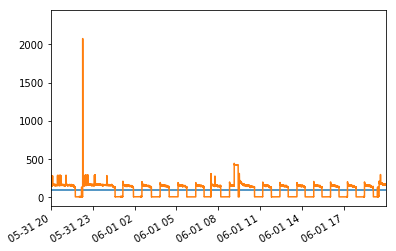

In [10]:
result = DataSet(disag_filename)
res_elec = result.buildings[6].elec
predicted = res_elec[APPLIANCE]
ground_truth = test_elec[APPLIANCE]

print("------ PLOTTING PREDICTION AND GROUND TRUTH ------")
predicted.power_series_all_data().plot()
ground_truth.power_series_all_data().plot()
# Change the limit to zoom-in or zoom-out the figure
plt.xlim('2011-06-01 00:00:00', '2011-06-01 23:59:00')
plt.show()

In [11]:
print("============ Relative error in total energy: {}".format(metrics.relative_error_total_energy(predicted, ground_truth)))
print("============ Mean absolute error(in Watts): {}".format(metrics.mean_absolute_error(predicted, ground_truth)))

/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/nilmtk/datastore/hdfdatastore.py:128: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  stop=look_ahead_end_i)
/Users/Caim03/anaconda3/envs/nilmtk-env/lib/python3.6/site-packages/pandas/core/internals.py:2633: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  return self.values.astype('datetime64[ns]').values


============ Relative error in total energy: 0.7297552760794632
============ Mean absolute error(in Watts): 80.9152033588593
